# **Install Ultralytics Library**

#This code installs the Ultralytics library to use the YOLO model for object detection.

In [ ]:
# install Ultralytics YOLO
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

# **Dataset Setup and Model Training**

#Imports required libraries, downloads the GlobalWheat2020 dataset, organizes images and annotations, creates a YAML file for a dataset subset, loads the pre-trained YOLO11n model, trains it for 5 epochs, uploads an image, and performs wheat head detection with visualization.

In [ ]:
# Import required libraries
from pathlib import Path
from ultralytics.utils.downloads import download
from ultralytics import YOLO
from google.colab import files

# Download dataset
dir = Path("GlobalWheat2020")
urls = [
    "https://zenodo.org/record/4298502/files/global-wheat-codalab-official.zip",
    "https://github.com/ultralytics/assets/releases/download/v0.0.0/GlobalWheat2020_labels.zip",
]
download(urls, dir=dir)

# Create directories for annotations, images, and labels
for p in "annotations", "images", "labels":
    (dir / p).mkdir(parents=True, exist_ok=True)

# Move images and annotations to appropriate directories
for p in (
    "arvalis_1",
    "arvalis_2",
    "arvalis_3",
    "ethz_1",
    "rres_1",
    "inrae_1",
    "usask_1",
    "utokyo_1",
    "utokyo_2",
    "nau_1",
    "uq_1",
):
    # Move images
    (dir / "global-wheat-codalab-official" / p).rename(dir / "images" / p)
    # Move annotations if they exist
    f = (dir / "global-wheat-codalab-official" / p).with_suffix(".json")
    if f.exists():
        f.rename((dir / "annotations" / p).with_suffix(".json"))

# Create YAML file for a subset of the dataset
yaml_content = """
path: GlobalWheat2020
train:
  - images/arvalis_1
val:
  - images/arvalis_2
names:
  0: wheat_head
"""
with open("GlobalWheat2020_subset.yaml", "w") as f:
    f.write(yaml_content)

# Load pre-trained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model for 5 epochs on the dataset subset
model.train(data="GlobalWheat2020_subset.yaml", epochs=5, imgsz=640)

# Upload image for detection
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Perform detection on the uploaded image
results = model(image_path)
results.show()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Unzipping GlobalWheat2020/global-wheat-codalab-official.zip to /content/GlobalWheat2020/global-wheat-codalab-official...: 100%|██████████| 4716/4716 [01:23<00:00, 56.26file/s] 
Unzipping GlobalWheat2020/GlobalWheat2020_labels.zip to /content/GlobalWheat2020/labels...: 100%|██████████| 3384/3384 [00:00<00:00, 6659.87file/s]


Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=GlobalWheat2020_subset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True,

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     


  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384,

train: Scanning /content/GlobalWheat2020/labels/arvalis_1... 1055 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1055/1055 [00:15<00:00, 69.41it/s]

train: New cache created: /content/GlobalWheat2020/labels/arvalis_1.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 142.6±13.6 MB/s, size: 2056.2 KB)


val: Scanning /content/GlobalWheat2020/labels/arvalis_2... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:02<00:00, 75.20it/s]

val: New cache created: /content/GlobalWheat2020/labels/arvalis_2.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.353      2.391      1.599        983        640: 100%|██████████| 66/66 [17:56<00:00, 16.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:20<00:00, 11.49s/it]

                   all        204       4270      0.378      0.232      0.209     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.995      1.246      1.325        688        640: 100%|██████████| 66/66 [17:41<00:00, 16.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:24<00:00, 12.04s/it]

                   all        204       4270      0.606      0.613      0.627      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.935      1.181      1.302        793        640: 100%|██████████| 66/66 [17:21<00:00, 15.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:25<00:00, 12.18s/it]

                   all        204       4270      0.556      0.607      0.583       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.904      1.135      1.289        910        640: 100%|██████████| 66/66 [17:14<00:00, 15.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:17<00:00, 11.11s/it]

                   all        204       4270      0.673      0.649      0.679      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.872      1.103       1.27       1151        640: 100%|██████████| 66/66 [17:16<00:00, 15.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:16<00:00, 10.95s/it]

                   all        204       4270      0.676      0.648      0.685      0.259



5 epochs completed in 1.571 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:07<00:00,  9.64s/it]


                   all        204       4270      0.673      0.648      0.679      0.259
Speed: 2.5ms preprocess, 247.4ms inference, 0.0ms loss, 18.7ms postprocess per image
Results saved to runs/detect/train


Saving download.jfif to download.jfif



FileNotFoundError: No images or videos found in download.jfif. Supported formats are:
images: {'bmp', 'dng', 'mpo', 'png', 'webp', 'heic', 'jpeg', 'tiff', 'pfm', 'jpg', 'tif'}
videos: {'webm', 'mpeg', 'gif', 'avi', 'mp4', 'ts', 'asf', 'mkv', 'wmv', 'mov', 'mpg', 'm4v'}

# **Image Upload and Detection**

#Imports libraries for visualization, uploads an image, loads the trained YOLO model, performs wheat head detection, and displays the image with bounding boxes using Matplotlib.

Saving 0a605d82ae502715e14a250858df7e2c4f80ce9b.jpeg to 0a605d82ae502715e14a250858df7e2c4f80ce9b.jpeg

image 1/1 /content/0a605d82ae502715e14a250858df7e2c4f80ce9b.jpeg: 480x640 1 wheat_head, 173.5ms
Speed: 6.8ms preprocess, 173.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


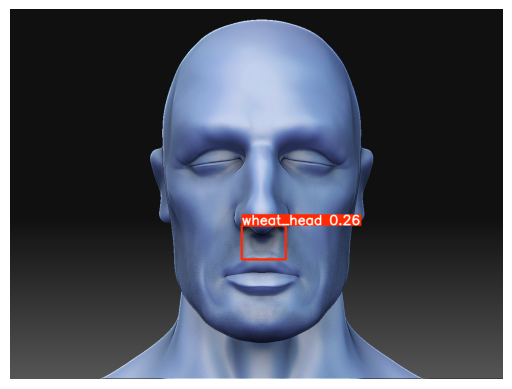

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
from PIL import Image
import numpy as np

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Perform detection on the uploaded image
model = YOLO("runs/detect/train/weights/best.pt")  # Path to the trained model
results = model(image_path)

# Display image with bounding boxes
for result in results:  # Iterate over the results list
    # Convert image to a format displayable with matplotlib
    img = result.plot()  # This method returns the image with bounding boxes
    plt.imshow(img)
    plt.axis('off')  # Turn off axes
    plt.show()

# **Inference with Trained Model**

#Loads the trained YOLO model from a .pt file, performs inference on a specified image, and displays the results with bounding boxes using Matplotlib. Optionally, allows further model training.


image 1/1 /content/images.jpg: 384x640 4 wheat_heads, 137.3ms
Speed: 3.3ms preprocess, 137.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


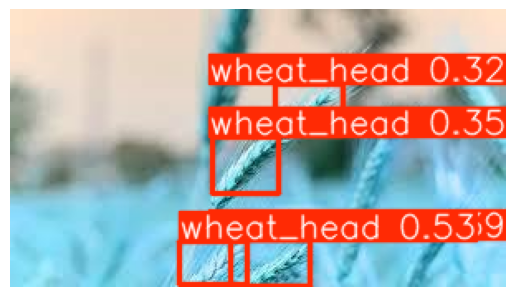

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the trained model from the .pt file
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Perform inference on an image
results = model("/content/images.jpg")

# Display image with bounding boxes
for result in results:  # Iterate over the results list
    # Convert image to a format displayable with matplotlib
    img = result.plot()  # This method returns the image with bounding boxes
    plt.imshow(img)
    plt.axis('off')  # Turn off axes
    plt.show()

# Optionally, you can continue training the model
# model.train(data="GlobalWheat2020_subset.yaml", epochs=3)